## Setup

In [2]:
# common imports
import numpy as np
import os

# random seed consistent
np.random.seed(420)

# to plot pretty pictures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models_mine"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()  # I don't know what this does.
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear regression using Normal Equation

In [7]:
X = 10 * np.random.rand(100,1)
y = 6 + -1 * X + np.random.rand(100,1)

Saving figure generated_data_plot


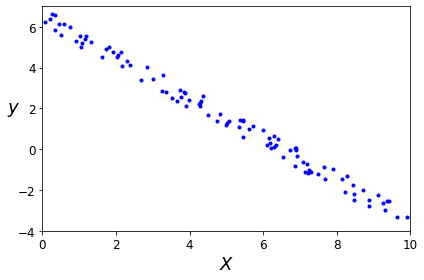

In [21]:
plt.plot(X, y, 'b.')
plt.xlabel('$X$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.axis([0,10,-4,7])
save_fig("generated_data_plot")
plt.show()

In [25]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # we're expecting [[6],[-1]]

array([[ 6.48478403],
       [-0.99609008]])

We can make predictions using this.

In [27]:
X_new = np.array([[0],[10]]) # predictions at points 0 and 10
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 6.48478403],
       [-3.47611672]])

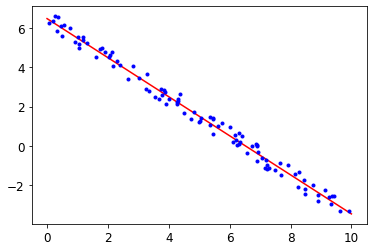

In [28]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

### Equivalent code in Scikit-Learn

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 6.48478403],
       [-3.47611672]])

## Complexity

We have $\theta = (X^T X)^{-1} X^T y$, which has $O(m^3 + m^2n)$ complexity, where $m$ is the number of features, while $n$ is the number of data points. This is apparently bad due to the $m^3$, but gradient decent has $O(m^2n)$, which is much better.

## Gradient decentm

The main idea is: $$\theta_{i+1} = \theta_i - \eta \nabla_\theta \textrm{MSE} (\theta_i),$$ where $\eta$ is the learning rate.

In [65]:
eta = 0.02
n_iterations = 1000
n = 100 # number of data points

theta = np.random.randn(2,1) # random normally distributed vector

for iteration in range(n_iterations):
    gradient = 2/n * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradient

theta

array([[ 6.48436474],
       [-0.99602479]])

When we run this with $\eta = 0.1$ we didn't get such a good result.